In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import Derivative, Symbol
from scipy.special import sph_harm 
from scipy import integrate
from scipy.integrate import dblquad
from scipy.integrate import quad
%run -i func_proj_reconst.ipynb

Input Streamfunction:

$$
\psi(\theta, \phi)= Re(Y_n^m(\theta,\phi))
= Re(Y_2^1(\theta,\phi)) = Re(A\cos\theta\sin\theta e^{i\phi}) = A\cos\theta\sin\theta \cos\phi
$$

$$
A = \frac{-1}{2}\sqrt{\frac{15}{2\pi}}
$$

Analytical expression for U and V:

$$
U(\theta, \phi)=-\frac{1}{r} \frac{\partial \psi}{\partial \phi} = \frac{A}{r}\cos\theta\sin\theta\sin\phi
$$

$$
V(\theta, \phi)=\frac{\sin \theta}{r}\frac{\partial \psi}{\partial \theta} = \frac{A\cos\phi}{r}(\cos^2\theta\sin\theta-\sin^3\theta)
$$

In [2]:
N_t = 100
N_p = 200
#make the starting point very small
theta = np.linspace(1e-6, np.pi, N_t) #50pts 
phi = np.linspace(0, 2*np.pi, N_p)  #100pts
t, p = np.meshgrid(theta, phi) #create a matrix with size theta x phi
lMax = 20 #lMax is N
omega = 3.6 #omega is te angular rotation
nu = 1.5  #\nu is kinematic viscosity
T = 4 #total time
r = 1 #let r=1

A = (-1/2)*((15/(2*np.pi))**(1/2))
U_tp = (A/r)*np.cos(t)*np.sin(t)*np.sin(p) #this is obtained by analytical calculation
V_tp = (A*np.cos(p)/r)*(np.cos(t)**2*np.sin(t)-np.sin(t)**3)


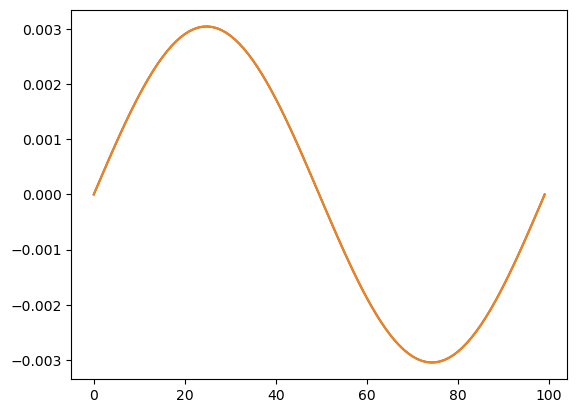

In [3]:
psi_tp_a = A*np.cos(t)*np.sin(t)*np.cos(p) 
psi_tp = np.real(sph_harm (1, 2, p.reshape(-1), t.reshape(-1)).reshape(N_p, N_t))
plt.plot(psi_tp[50,:]); 
plt.plot(psi_tp_a[50,:])

max difference between numerical and analytical calculated U
 0.006096797284843101
max difference between numerical and analytical calculated V
 0.000518206310666014


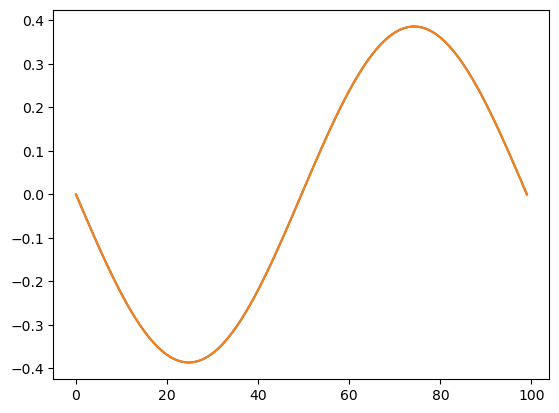

In [4]:
#U_tp_n is the numerical expression of U_tp
psi_tp = np.real(sph_harm (1, 2, p.reshape(-1), t.reshape(-1)).reshape(N_p, N_t))
U_tp_n = -(1/r)*np.gradient(psi_tp, phi, axis=0)
V_tp_n = (np.sin(t)/r)*np.gradient(psi_tp, theta, axis=1)
print ("max difference between numerical and analytical calculated U\n",np.amax(np.abs(U_tp_n-U_tp)))
print ("max difference between numerical and analytical calculated V\n",np.amax(np.abs(V_tp_n-V_tp)))
#plt.pcolormesh(psi_tp)
plt.plot(U_tp[50,:]); 
plt.plot(U_tp_n[50,:])

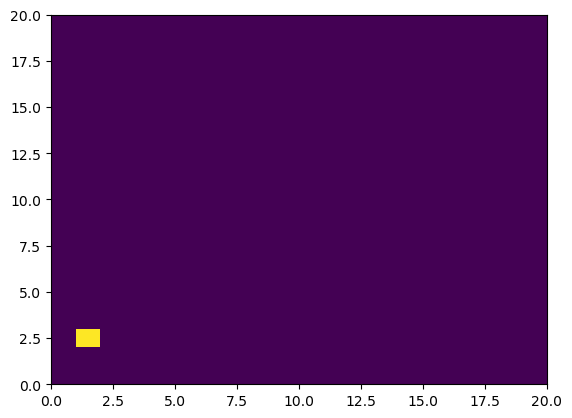

In [5]:
psi_nm = projection(psi_tp, theta, phi, lMax)
plt.pcolormesh(psi_nm.real)

max difference between original and reconstructed psi
 0.0004730962986774778


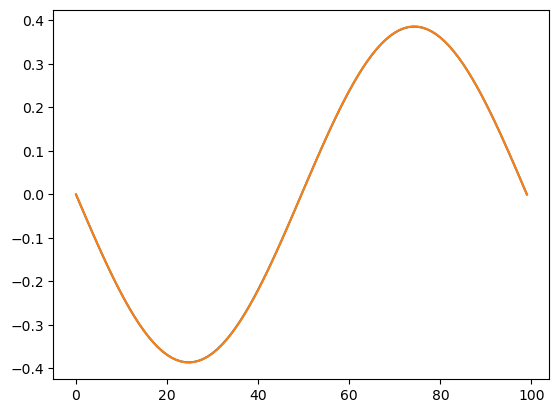

In [6]:
psi_TP = reconstruction(psi_nm, theta, phi, lMax)
print ("max difference between original and reconstructed psi\n",np.amax(np.abs(psi_TP-psi_tp)))
#plt.pcolormesh(psi_TP.real - psi_tp.real)
plt.plot(psi_TP[0,:]); plt.plot(psi_tp[0,:])

In [7]:
u_nm = projection(U_tp, theta, phi, lMax) #project U_tp to u_nm
v_nm = projection(V_tp, theta, phi, lMax) 

U_TP = reconstruction(u_nm, theta, phi, lMax) #reconstructed U(theta, phi) using u_nm
V_TP = reconstruction(v_nm, theta, phi, lMax) 

In [8]:
print ("max difference between original and reconstructed analytical U\n",np.amax(np.abs(U_TP-U_tp)))
print ("max difference between original and reconstructed analytical V\n",np.amax(np.abs(V_TP-V_tp)))

max difference between original and reconstructed analytical U
 6.966727100635173e-05
max difference between original and reconstructed analytical V
 0.0016514821016478942


In [9]:
u_nm_n = projection(U_tp_n, theta, phi, lMax) #project U_tp to u_nm
v_nm_n = projection(V_tp_n, theta, phi, lMax) 

U_TP_n = reconstruction(u_nm_n, theta, phi, lMax) #reconstructed U(theta, phi) using u_nm
V_TP_n = reconstruction(v_nm_n, theta, phi, lMax) 

max difference between reconstructed numerical and analytical U
 6.416684404908501e-05
max difference between reconstructed numerical and analytical V
 0.0005180642204686281


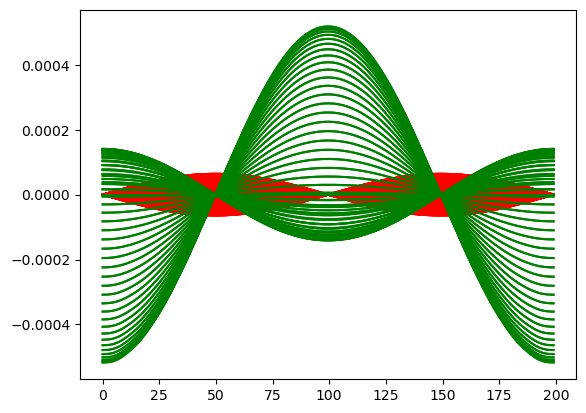

In [10]:
print ("max difference between reconstructed numerical and analytical U\n",np.amax(np.abs(U_TP_n-U_TP)))
print ("max difference between reconstructed numerical and analytical V\n",np.amax(np.abs(V_TP_n-V_TP)))
plt.plot(U_TP_n-U_TP, label='max difference between original and reconstructed numerical U', color='red')
plt.plot(V_TP_n-V_TP, label='max difference between original and reconstructed numerical V', color='green')

In [11]:
print ("max difference between original and reconstructed numerical U\n",np.amax(np.abs(U_TP_n-U_tp_n)))
print ("max difference between original and reconstructed numerical V\n",np.amax(np.abs(V_TP_n-V_tp_n)))

max difference between original and reconstructed numerical U
 0.006096797284843111
max difference between original and reconstructed numerical V
 0.0016503736309362305


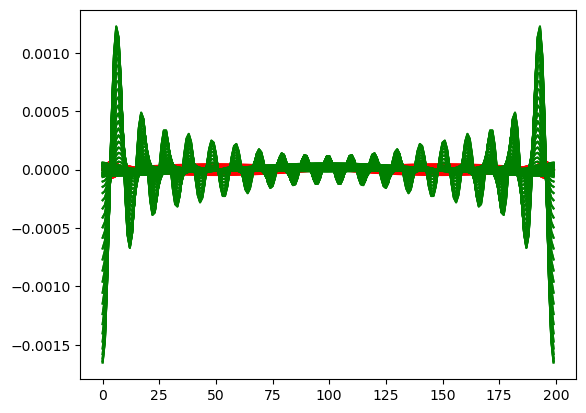

In [12]:
plt.plot(U_TP-U_tp, label='max difference between original and reconstructed analytical U', color='red')
plt.plot(V_TP-V_tp, label='max difference between original and reconstructed analytical V', color='green')

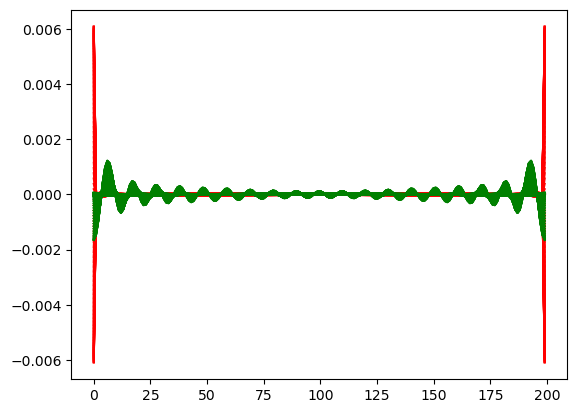

In [13]:
plt.plot(U_TP_n-U_tp_n, label='max difference between original and reconstructed numerical U', color='red')
plt.plot(V_TP_n-V_tp_n, label='max difference between original and reconstructed numerical V', color='green')